In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import select_features
#archivo = '..\data\ISBSG - Release May 2017 R1.csv'
archivo = '..\data\ISBSG DATA Release 12.csv'
df = pd.read_csv(archivo, sep = ';', low_memory = False)
#variables = ['Data Quality Rating', 'UFP rating', 'Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Count Approach', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Summary Work Effort', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Resource Level', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count', 'Agile Method Used']
variables = ['Data Quality Rating', 'UFP rating', 'Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Count Approach', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Summary Work Effort', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Resource Level', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count']
df = df.loc[:, variables]
filtro = ((df['Data Quality Rating'] == 'A') | (df['Data Quality Rating'] == 'B')) & ((df['UFP rating'] == 'A') | (df['UFP rating'] == 'B')) 
df = df.loc[filtro, :]
filtro = (df['Normalised Work Effort Level 1'].notnull()) & (df['Normalised Work Effort Level 1'] == df['Summary Work Effort'])
df = df.loc[filtro, :]
filtro = df['Count Approach'] == 'IFPUG 4+'
df = df.loc[filtro, :]
#variables = ['Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count', 'Agile Method Used']
variables = ['Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count']
df = df.loc[:, variables]
df = df.dropna(axis=1, thresh=int(0.5*len(df)))
df = df.dropna()
print(len(df))
df['Project Elapsed Time'] = df['Project Elapsed Time'].str.replace(',', '.').astype(float)
programmingLenguaje = {'A:G':'Unspecified', 'ASP.Net':'ASP', 'BASIC':'Visual Basic', 'CSP':'Unspecified', 'Visual C':'C'}
df['Primary Programming Language'].replace( programmingLenguaje, inplace = True)
database = {'[;].*':';','ACCESS[; ].*':'ACCESS', 'MS Access':'ACCESS', 'ACCESS;':'ACCESS', 'ADABAS;':'ADABAS', 'Micosoft.*':'Attain', 'DB2[; /].*':'DB2', 'IBM DB2':'DB2', 'UDB2':'DB2', 'Domino[ ].*':'Domino', 'LOTUS.*':'Domino', 'Notes.*':'Domino', 'Exchange.*':'Exchange', 'FOXPRO;':'Foxpro', 'HIRDB;':'HIRDB', 'DB[/].*':'IMS', 'DEDB;':'IMS', 'IDMS[; -].*':'IMS', 'IMS.*':'IMS', 'MS[- ]SQL[; ].*':'MS SQL', 'MSDE.*':'MS SQL', 'SQL Server[; ].*':'MS SQL', 'SQL;':'MS SQL', 'VSE/.*':'MS SQL', 'NCR;':'NCR', 'Oracle.*':'ORACLE', 'Personal O.*':'ORACLE', 'RDB[; ].*':'ORACLE', 'CICS;':'ORACLE', 'SAS;':'SAS', 'Solid;':'Solid', 'SYBASE.*':'SYBASE', 'YES':'Unspecified', 'ISAM;':'Unspecified', 'multiple;':'Unspecified', 'VSAM[; ].*':'Unspecified', 'WATCOM[; ].*':'Watcom', 'WGRES;':'WGRES'}
df['1st Data Base System'].replace( database, inplace = True, regex = True)
df['1st Data Base System'].replace( {'ACCESS;':'ACCESS'}, inplace = True, regex = True)

621


In [13]:
df_small = df.loc[:,['Normalised Work Effort Level 1', 'Used Methodology']].head(10)
mmre = select_features.calcular_mmre('Normalised Work Effort Level 1', select_features.recode_dataframe(df_small))
print(mmre)

1.8960766276898564


In [2]:
mi = select_features.calcular_mi_manual('Normalised Work Effort Level 1', df)
variables_por_mi = list(mi.index.values)
resultados = []
df = select_features.recode_dataframe(df)
for i in range(500):
    var = variables_por_mi[:]
    mmre = select_features.greedy_forward_selection(1, 'Normalised Work Effort Level 1', var, df, seed=i)
    resultados.append((mmre[3])[-1])
final_value = np.mean(resultados)

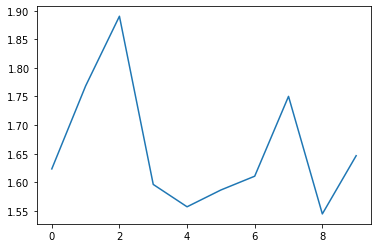

In [4]:
plt.plot(resultados)

In [2]:
lista_variables = ['Adjusted Function Points', 'Functional Size', 'Project Elapsed Time', 'Primary Programming Language', 'Industry Sector', '1st Data Base System', 'Development Platform', 'Used Methodology', 'Development Type', 'Language Type', 'Application Group']
df = select_features.recode_dataframe(df)
greedyfs = select_features.greedy_forward_selection(5, 'Normalised Work Effort Level 1', lista_variables, df, seed=1)

In [ ]:
lista_variables = ['Adjusted Function Points', 'Functional Size', 'Project Elapsed Time', 'Primary Programming Language', 'Industry Sector', '1st Data Base System', 'Development Platform', 'Used Methodology', 'Development Type', 'Language Type', 'Application Group']
variables_numericas = ['Adjusted Function Points', 'Functional Size', 'Project Elapsed Time']
variables_nominales = ['Primary Programming Language', 'Industry Sector', '1st Data Base System', 'Development Platform', 'Used Methodology', 'Development Type', 'Language Type', 'Application Group']
df = select_features.recode_dataframe(df)
#results = select_features.evaluator(3, 5, df, 'Normalised Work Effort Level 1')
greedyfs = select_features.greedy_forward_selection(5, 'Normalised Work Effort Level 1', lista_variables, df)
print('Greedy Finalizado')
doquirefs = select_features.doquire_forward_selection(5, 'Normalised Work Effort Level 1', variables_numericas, variables_nominales, df)

In [ ]:
#Pruebas del algoritmo de extraccion
lista_variables = ['Adjusted Function Points', 'Functional Size', 'Project Elapsed Time', 'Primary Programming Language', 'Industry Sector', '1st Data Base System', 'Development Platform', 'Used Methodology', 'Development Type', 'Language Type', 'Application Group']
df = select_features.recode_dataframe(df)
resultado = select_features.determinar_numero_variables('Normalised Work Effort Level 1', lista_variables, [], df, verbose=True)

In [ ]:
variables_numericas = ['Adjusted Function Points', 'Functional Size', 'Project Elapsed Time']
variables_nominales = ['Primary Programming Language', 'Industry Sector', '1st Data Base System', 'Development Platform', 'Used Methodology', 'Development Type', 'Language Type', 'Application Group']
df = select_features.recode_dataframe(df)
resultado = select_features.determinar_numero_variables('Normalised Work Effort Level 1', variables_numericas=variables_numericas, variables_nominales=variables_nominales, df=df, verbose=True)

In [2]:
#Calcular MMRE utilizando R y VIM
df = select_features.recode_dataframe_R(df)
mmreR, resultado = select_features.calcular_mmre_R('Normalised_Work_Effort_Level_1', df)

R[write to console]: trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.0/FSelector_0.31.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 94668 bytes (92 KB)

R[write to console]: downloaded 92 KB


R[write to console]: trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.0/VIM_6.0.0.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 2192119 bytes (2.1 MB)

R[write to console]: downloaded 2.1 MB


package 'FSelector' successfully unpacked and MD5 sums checked
package 'VIM' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ivana\AppData\Local\Temp\RtmpOQb2HT\downloaded_packages


In [ ]:
#Pruebas KNN con dataframes pequeños
df = select_features.recode_dataframe(df)
df_knn_small = df.iloc[0:5]
mmrev1, res1 = select_features.calcular_mmre('Normalised Work Effort Level 1',df_knn_small, k=2)
mmrev2, res2 = select_features.calcular_mmre_v2('Normalised Work Effort Level 1', df_knn_small, k=2)
print('MMRE',mmrev1)
print('MMREv2',mmrev2)

In [ ]:
df = select_features.recode_dataframe(df)
pruebak = pd.DataFrame(columns=['Scikit', 'FancyImpute'])
for i in range(1,11):
    mmrev1 = select_features.calcular_mmre('Normalised Work Effort Level 1', df, i)
    mmrev2 = select_features.calcular_mmre_v2('Normalised Work Effort Level 1', df, i)
    print('MMRE using', i, 'neighbors', mmrev1)
    print('MMREv2 using', i, 'neighbors', mmrev2)
    pruebak = pruebak.append({'Scikit':mmrev1, 'FancyImpute':mmrev2}, ignore_index=True)
pruebak.index += 1
pruebak.plot.bar(figsize=(10, 5))

In [2]:
mmre = select_features.calcular_mmre('Normalised Work Effort Level 1', select_features.recode_dataframe(df), k=2)
mmre

(1.7525037883624113,
      Valor Original  Valor Imputado
 0           18160.0          4325.5
 1            2924.0          3356.5
 2             668.0          1595.0
 3            4805.0         10507.5
 4            2006.0           747.0
 ..              ...             ...
 616           129.0           429.5
 617          2716.0          5202.5
 618          2185.0          1974.0
 619          1011.0          2738.0
 620          7722.0         19190.0
 
 [621 rows x 2 columns])

In [ ]:
df = select_features.recode_dataframe_R(df)
mi1 = select_features.calcular_mi_R_2v('Project_Elapsed_Time', 'Functional_Size', df)
mi2 = select_features.calcular_mi_R_2v('Functional_Size', 'Project_Elapsed_Time' ,df)
print(mi1)
print(mi2)

In [ ]:
#df = select_features.recode_dataframe_R(df)
mi = select_features.calcular_mi_R('Normalised_Work_Effort_Level_1', select_features.recode_dataframe_R(df))
print(mi)
mi.plot.bar(figsize=(10, 5))

R[write to console]: trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.0/FSelector_0.31.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 94667 bytes (92 KB)

R[write to console]: downloaded 92 KB


R[write to console]: trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.0/VIM_6.0.0.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 2193308 bytes (2.1 MB)

R[write to console]: downloaded 2.1 MB


package 'FSelector' successfully unpacked and MD5 sums checked
package 'VIM' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ivana\AppData\Local\Temp\RtmpWWv5We\downloaded_packages
{'Adjusted_Function_Points': -1.2793040819799297, 'Project_Elapsed_Time': 0.07034961061944411, 'Primary_Programming_Language': 0.01443762104378088, 'First_Data_Base_System': 0.004184669102830441, 'Industry_Sector': -0.001495110868443117, 'Development_Platform': -0.016316256418164

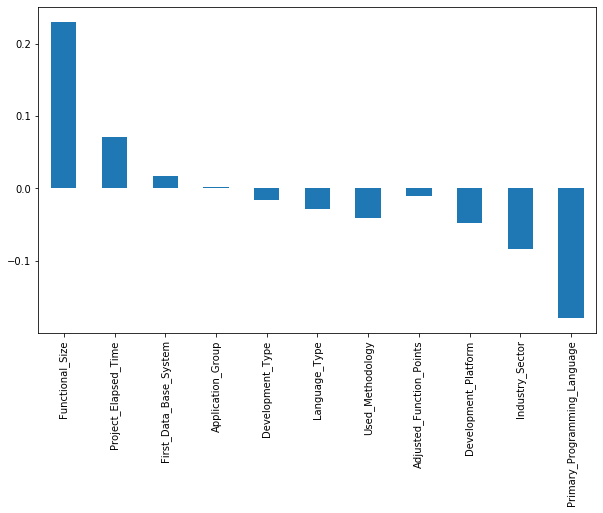

In [3]:
df = select_features.recode_dataframe_R(df)
mrmr = select_features.calcular_mrmr_R('Normalised_Work_Effort_Level_1', df)
print(mrmr)
mrmr.plot.bar(figsize=(10, 6))

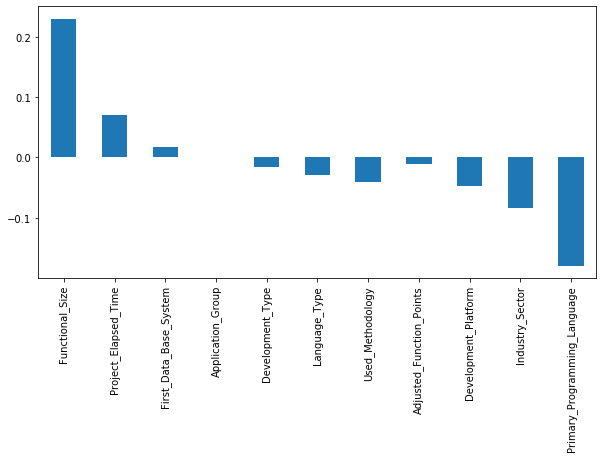

In [4]:
mrmr.plot.bar(figsize=(10, 5))

In [ ]:
testing = select_features.calc_mi_scikit(df['1st Data Base System'], df['Adjusted Function Points'])
print(testing)
testing = select_features.calc_mi_scikit(df['Adjusted Function Points'], df['1st Data Base System'])
print(testing)

dtype('float64')

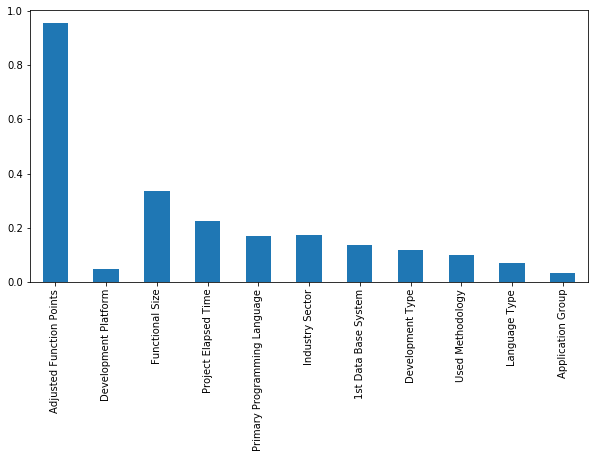

In [2]:
mRMR = select_features.calcular_mrmr_v2('Normalised Work Effort Level 1', df)
#mRMR.sort_values(ascending=False).plot.bar(figsize=(10, 5))
mRMR.plot.bar(figsize=(10, 5))
mRMR.dtypes

In [2]:
df.dtypes

Industry Sector                    object
Application Group                  object
Development Type                   object
Development Platform               object
Language Type                      object
Primary Programming Language       object
Functional Size                   float64
Adjusted Function Points          float64
Normalised Work Effort Level 1    float64
Project Elapsed Time              float64
1st Data Base System               object
Used Methodology                   object
dtype: object

Adjusted Function Points        0.956524
Functional Size                 0.955140
Project Elapsed Time            0.707565
Primary Programming Language    0.569439
Industry Sector                 0.486520
1st Data Base System            0.447903
Development Platform            0.314327
Used Methodology                0.219722
Development Type                0.202390
Language Type                   0.172220
Application Group               0.073070
dtype: float64


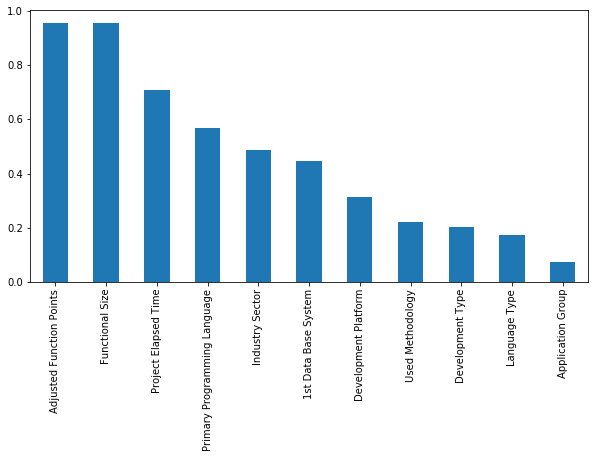

In [2]:
#Utilizando el método normalize_mutual_info_score
mi = select_features.calcular_mi_manual('Normalised Work Effort Level 1', df)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
print(mi)

In [8]:
df.select_dtypes(include=["number"]).columns.values

array(['Functional Size', 'Adjusted Function Points',
       'Normalised Work Effort Level 1', 'Project Elapsed Time'],
      dtype=object)

In [ ]:
#variables = ['Industry Sector', 'Application Group', 'Development Type', 'Platform Development', 'Language Type', 'Primary Programming Language', '1st Data Base System', 'Used Methodology']
variables = ['1st Data Base System']
dcount = df.loc[:, variables]
for c in dcount.columns:
    print("---- %s ---" % c)
    print(dcount[c].value_counts())
    print('')